# Il naufragio del RMS Titanic e la probabilità secondo Kolmogorov

La lista dei passegeri è pubblica con una serie di informazioni interessanti, compreso l'esito del viaggio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import wget

Diversi dati sui passeggeri del Titanic sono dispoibili online. Sorgente: https://github.com/tpradeep8/tableau-data-visualization

La descrizione dei campi si trova [qui](https://rstudio-pubs-static.s3.amazonaws.com/370028_029c1fc5d91f4d37a55b1f0b4e8d779f.html) insieme ad alcuni grafici.

Per comodità, possiamo scaricare direttamente il file in un'area locale con ```wget```.

Consideriamo anche che in futuro quei dati potrebbero non essere più disponibili in rete!

In [2]:
wget.download('https://raw.githubusercontent.com/tpradeep8/tableau-data-visualization/master/titanic passenger list.csv', out='data')

'data/titanic passenger list (1).csv'

Il file con i dati può essere anche caricato direttamente dal repository remoto:

```
df = pd.read_csv('https://github.com/tpradeep8/tableau-data-visualization/raw/master/titanic%20passenger%20list.csv')
```

Per motivi di rapidità e per avere una soluzione in caso di problemi di rete, è conveniente avere i dati in locale:

In [3]:
df = pd.read_csv('data/titanic passenger list.csv')

# Visualizzazione
I dati si possono visualizzare in forma di tabella

In [4]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
df['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

In [6]:
sex_counts = df.sex.value_counts()
sex_counts

male      843
female    466
Name: sex, dtype: int64

In [7]:
sex_counts.male

843

In [8]:
sex_counts.female

466

In [9]:
passengers=sex_counts.sum()
print(passengers)

1309


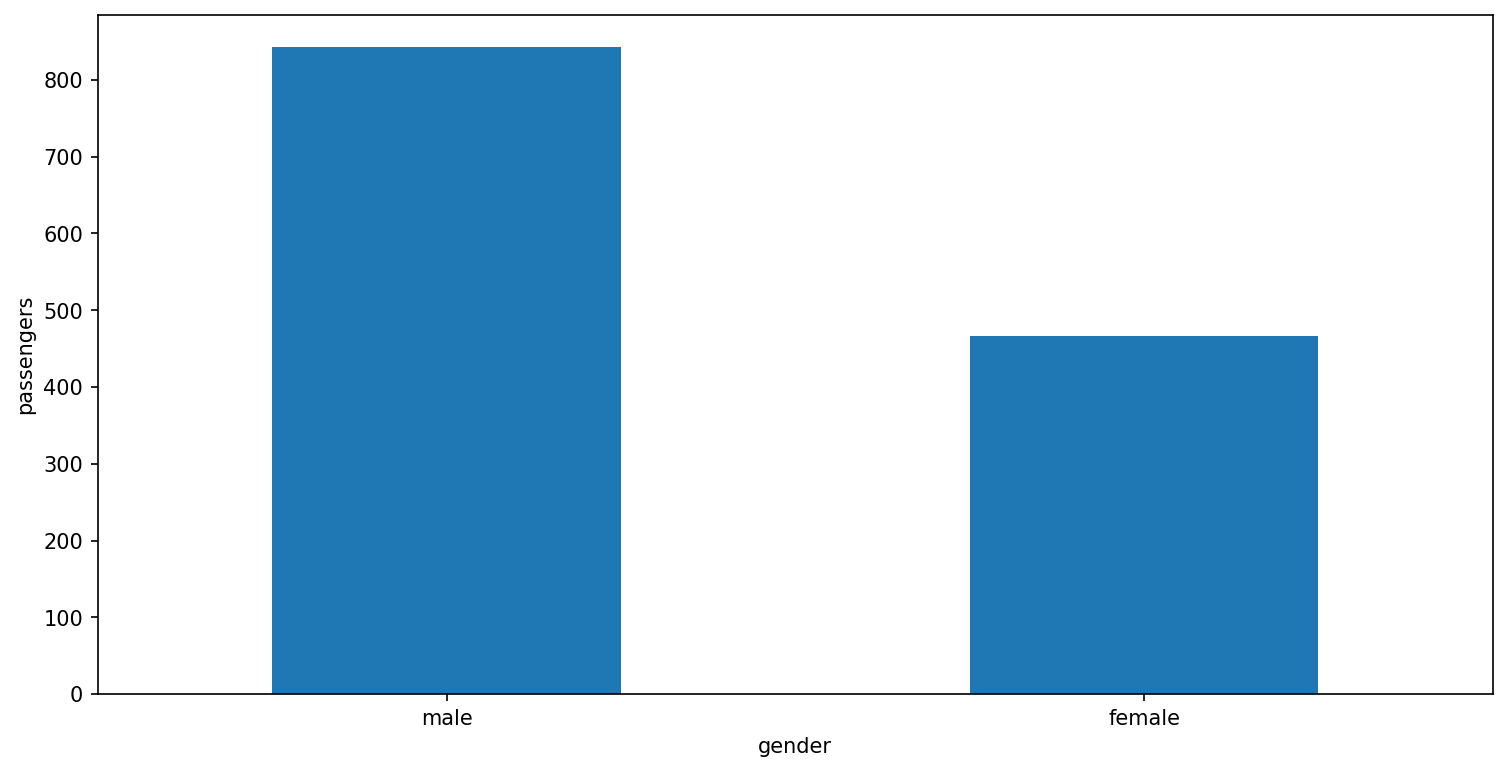

In [10]:
plt.figure(figsize=(12,6), dpi=150)
sex_counts.plot.bar()
plt.xlabel('gender')
plt.ylabel('passengers')
plt.xticks(rotation=0)
plt.show()

L'ordinamento di default è quello del numero di occorrenze.

In [11]:
df.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

Conviene ordinare i valori usando come l'indice con la funzione ```sort_index```.

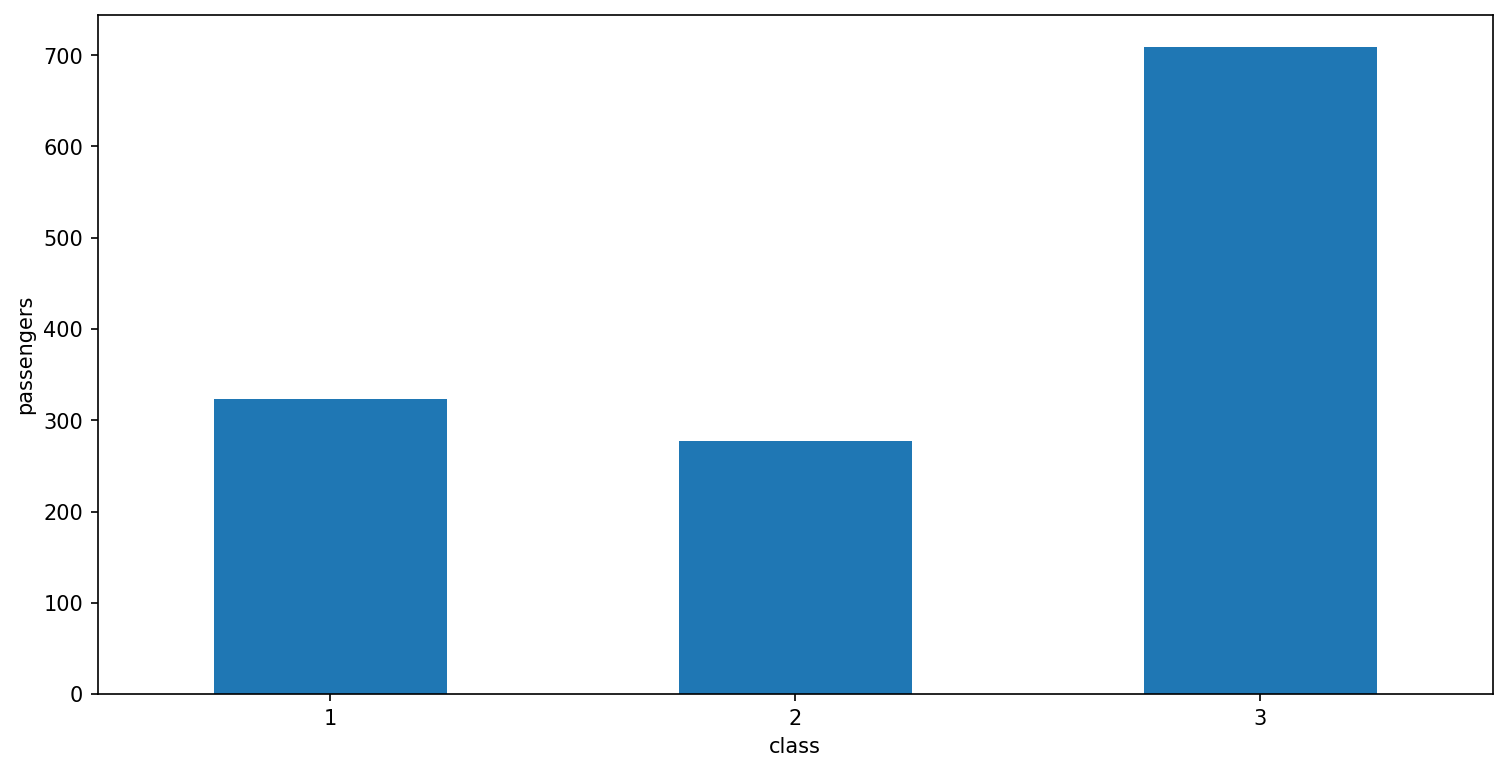

In [12]:
plt.figure(figsize=(12,6), dpi=150)
df.pclass.value_counts().sort_index().plot.bar()
plt.xlabel('class')
plt.xticks(rotation=0)
plt.ylabel('passengers')
plt.show()

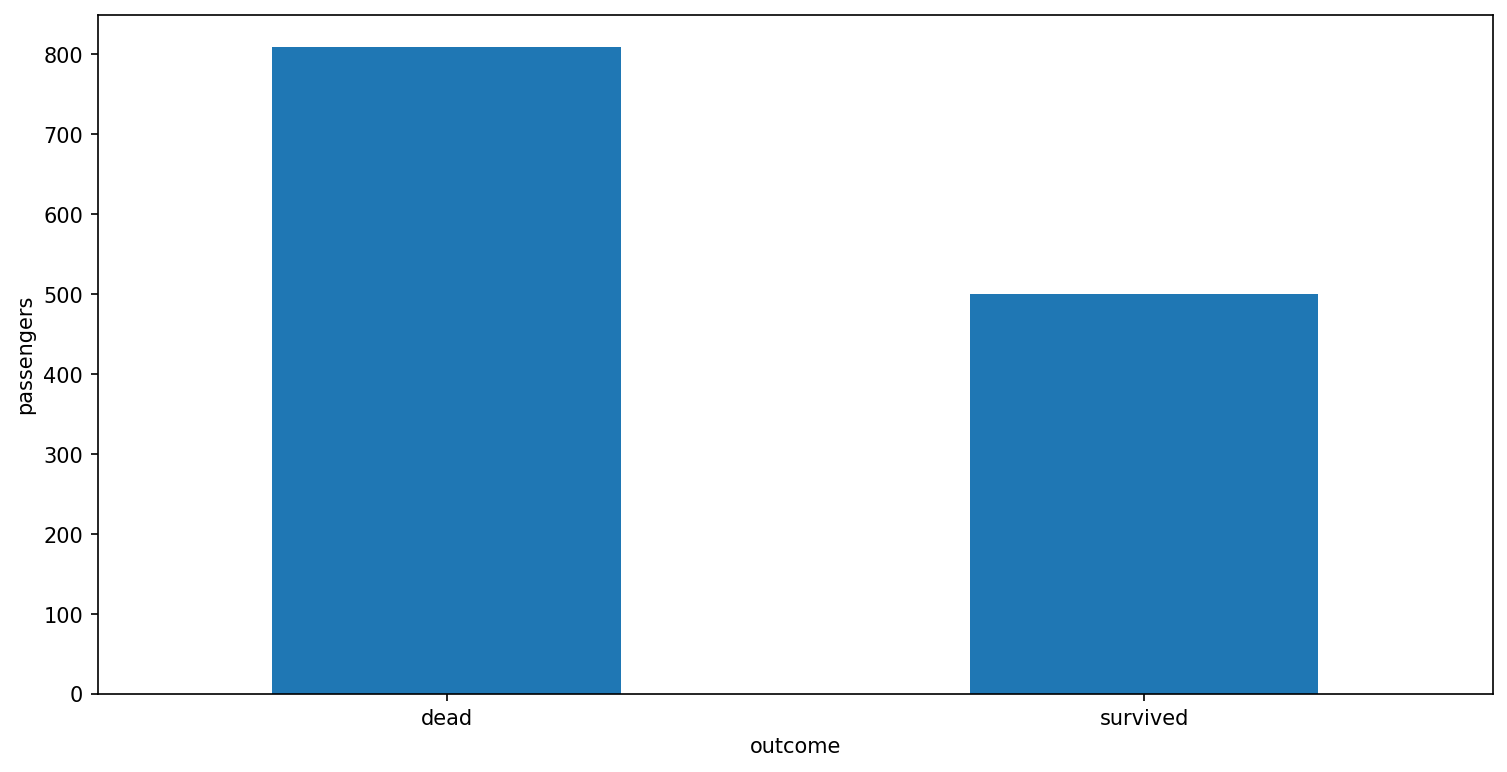

In [13]:
plt.figure(figsize=(12,6), dpi=150)
df['survived'].value_counts().rename({0: 'dead', 1: 'survived'}).plot(kind='bar')
plt.xlabel('outcome')
plt.xticks(rotation=0)
plt.ylabel('passengers')
plt.show()

Studiamo la distribuzione di età. Di nuovo, converrà ordinare per l'indice, che è uguale all'età espressa in anni

In [14]:
df['age'].value_counts().sort_index()

0.17     1
0.33     1
0.42     1
0.67     1
0.75     3
        ..
70.50    1
71.00    2
74.00    1
76.00    1
80.00    1
Name: age, Length: 98, dtype: int64

Possiamo approssimare a zero le età minori di un anno, per uniformità di visualizzazione.

In [15]:
age_distr = np.floor(df['age']).value_counts().sort_index()
age_distr

0.0     12
1.0     10
2.0     12
3.0      7
4.0     10
        ..
70.0     3
71.0     2
74.0     1
76.0     1
80.0     1
Name: age, Length: 73, dtype: int64

Mostriamo in un grafico la distribuzione di età dei passegggeri.

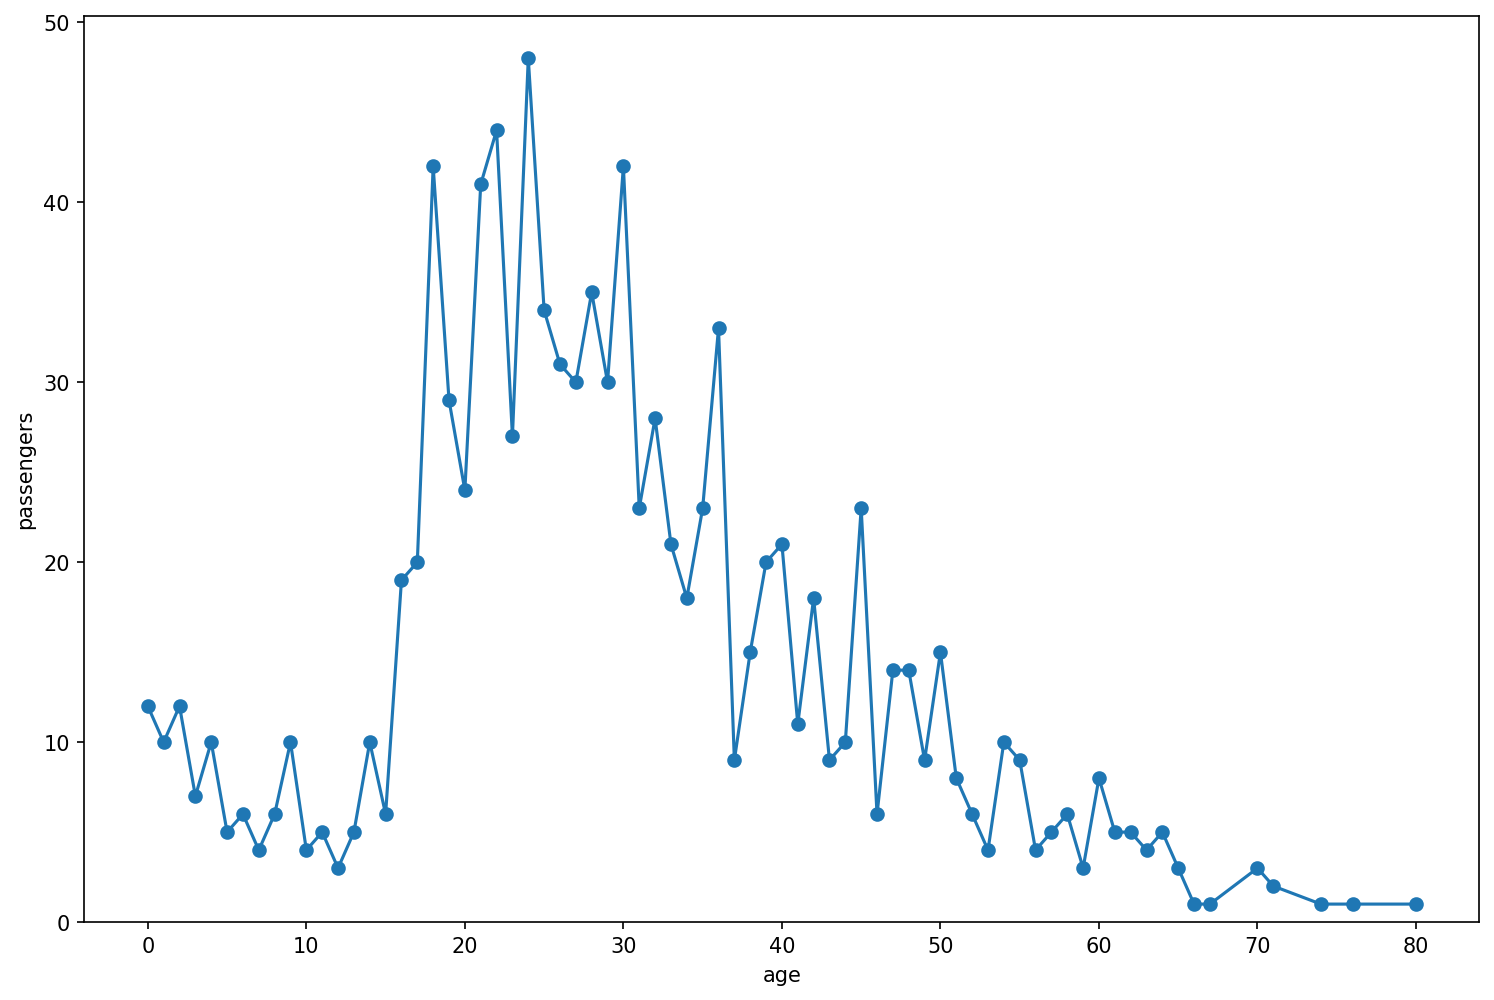

In [16]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)
age_distr.plot(figsize=(12,8),marker='o')
ax.set_xlabel('age')
ax.set_ylabel('passengers')
ax.set_ylim(0)
fig.show()

La distribuzione cumulativa, ossia la frazione di passeggeri che hanno almeno una certa età, si può calcolare con ```cumsum()```.

Per alcuni passeggeri l'età non è nota, quindi dovremo considerare che per un certo numero di casi l'età è ```NaN```.

all passengers:  1309 age unknown:  263


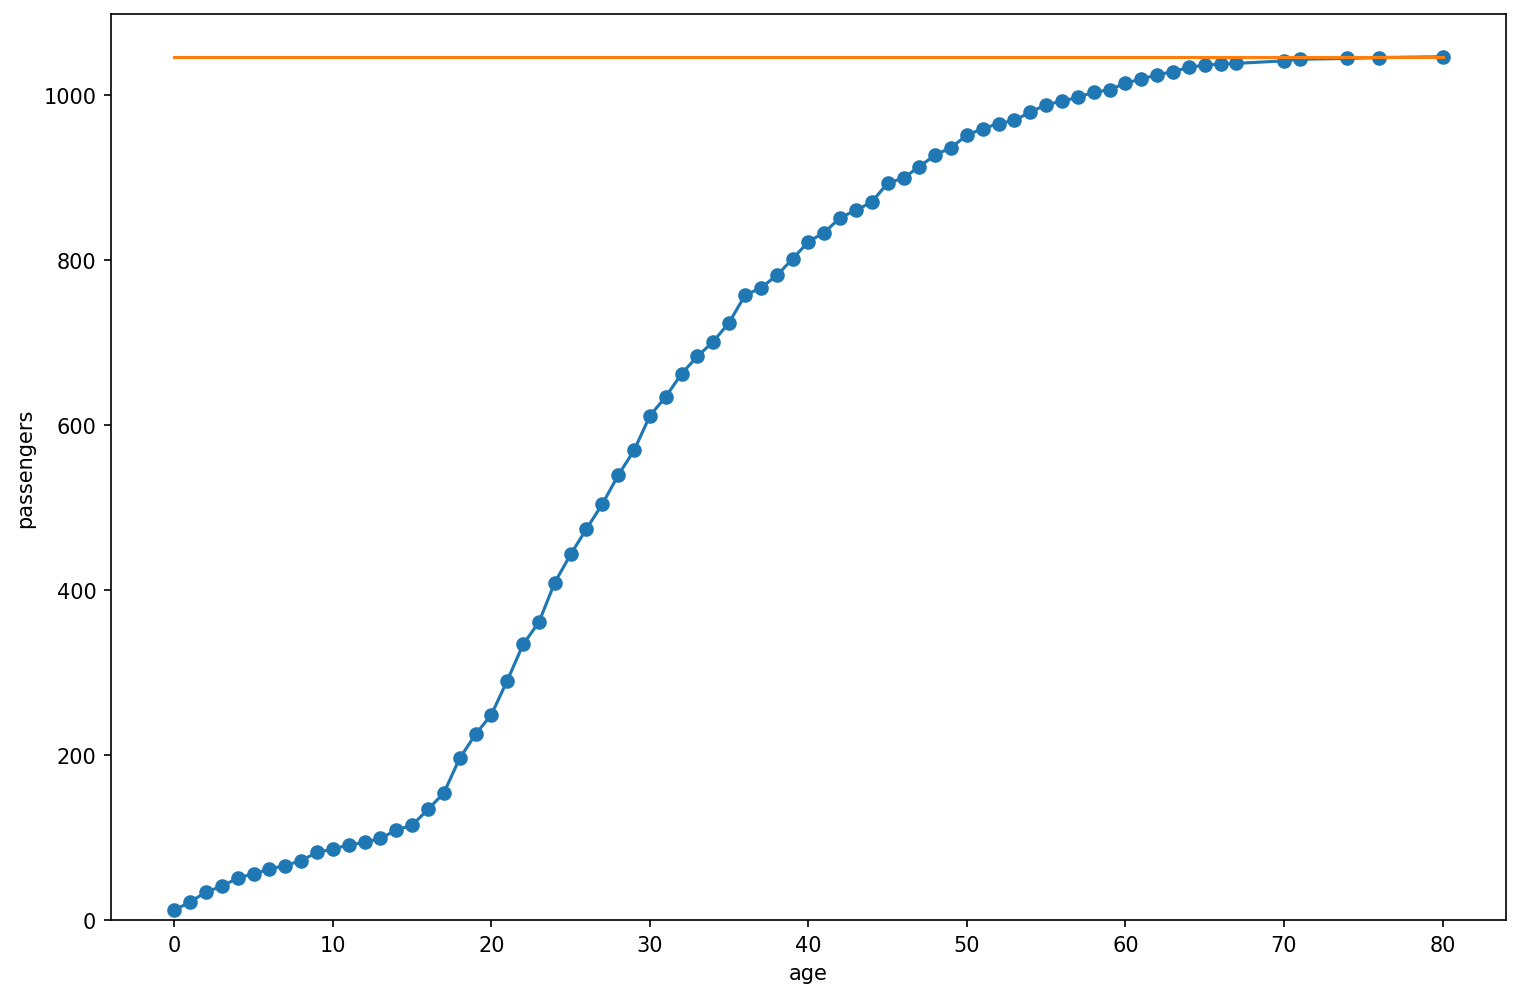

In [17]:
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)
age_distr.cumsum().plot(figsize=(12,8),marker='o')
ax.set_xlabel('age')
ax.set_ylabel('passengers')
ax.set_ylim(0)
na = df.age.isna().sum()
print("all passengers: ", passengers, "age unknown: ", na)
age_known = passengers-na
plt.plot([0, 80],[age_known,age_known])
fig.show()

Analizziamo il genere. Per uniformità, ordiniamo di nuovo l'indice, per cui ```female``` verrà prima di ```male```, in ordine alfabetico.

In [18]:
c_gender = df.sex.value_counts().sort_index()
c_gender

female    466
male      843
Name: sex, dtype: int64

In [19]:
genders = c_gender.index.values
print('genders: ',genders)

genders:  ['female' 'male']


In [20]:
for i in range(len(genders)):
    print(genders[i],":", c_gender[i])

female : 466
male : 843


In [21]:
df[df.sex=='male'].survived.value_counts()

0    682
1    161
Name: survived, dtype: int64

In [22]:
df[df.sex=='female'].survived.value_counts()

1    339
0    127
Name: survived, dtype: int64

In [23]:
m_survived = df[df.sex=='male'].survived.value_counts().sort_index()
f_survived = df[df.sex=='female'].survived.value_counts().sort_index()
print("males, survived: ", m_survived[1], " dead: ", m_survived[0])
print("females, survived: ", f_survived[1], " dead: ", f_survived[0])

males, survived:  161  dead:  682
females, survived:  339  dead:  127


In [24]:
survived_sex = df[df.survived==1].sex.value_counts().sort_index()
dead_sex = df[df.survived==0].sex.value_counts().sort_index()

In [25]:
print("survived, f: ", survived_sex.female, " m: ", survived_sex.male)
print("dead, f: ", dead_sex.female, " m: ", dead_sex.male)

survived, f:  339  m:  161
dead, f:  127  m:  682


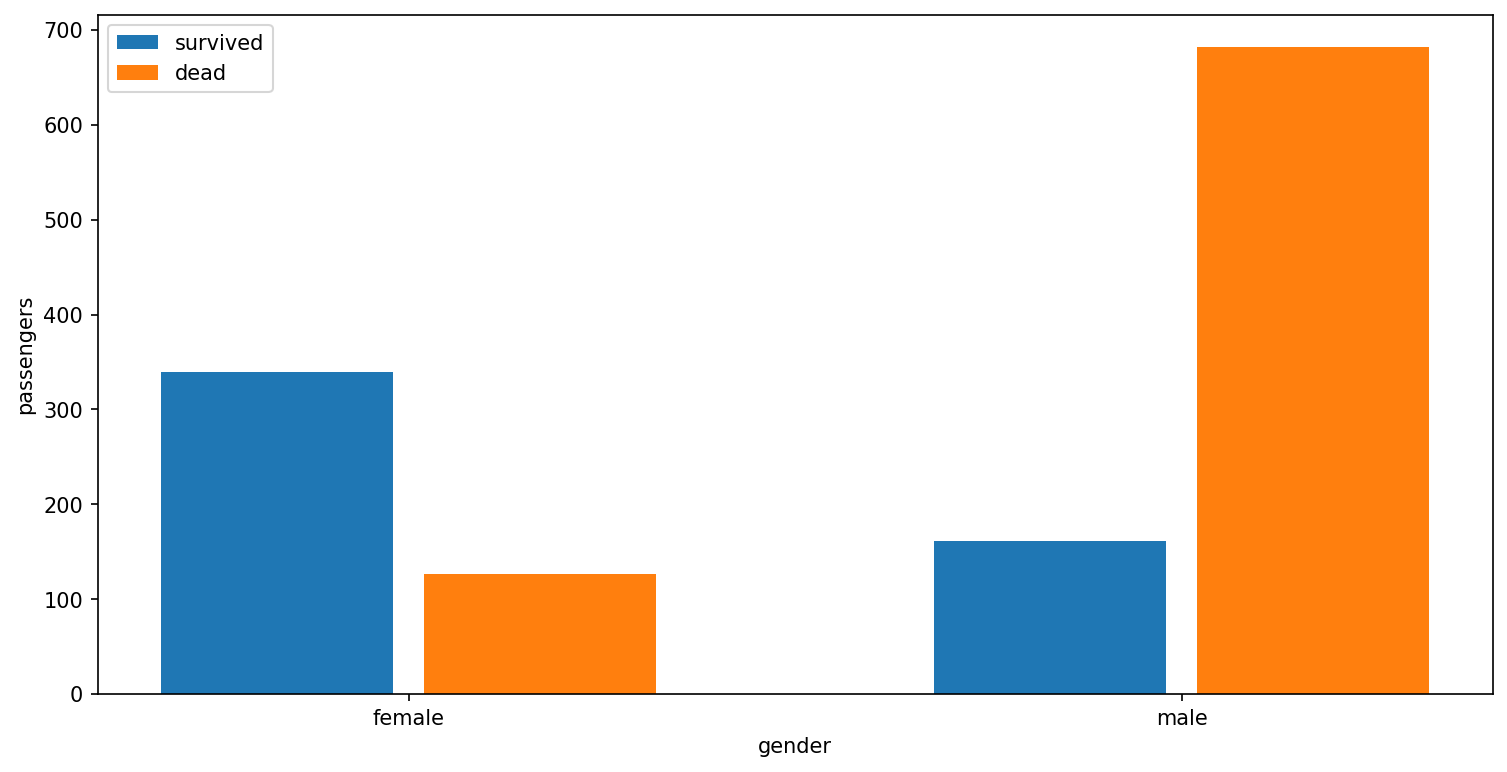

In [26]:
fig, ax = plt.subplots(figsize=(12,6), dpi=150)
labels = genders
x = np.arange(len(labels))
w=0.3
plt.bar(x=x-w/2-0.02, height=survived_sex, width=w, label='survived')
plt.bar(x=x+w/2+0.02, height=dead_sex, width=w, label='dead')
plt.xlabel('gender')
plt.ylabel('passengers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

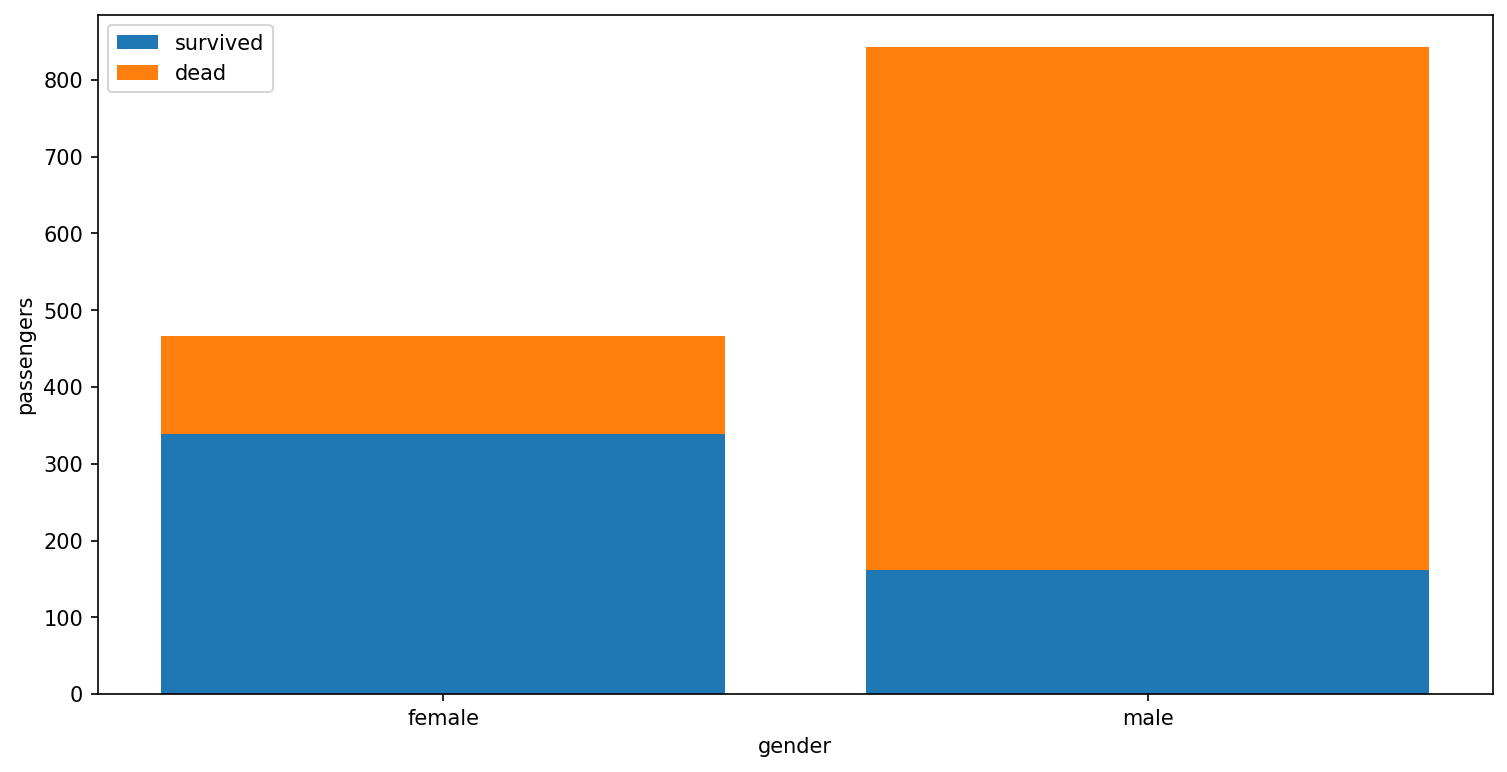

In [27]:
plt.figure(figsize=(12,6), dpi=150)
plt.bar(x=genders, height=survived_sex, label='survived')
plt.bar(x=genders, bottom=survived_sex, height=dead_sex, label='dead')
plt.xlabel('gender')
plt.ylabel('passengers')
plt.legend()
plt.show()

# Approccio assiomatico di Kolmogorov alla probabilità

Consideriamo un *sample space* $\Omega$ e un *event space* $F \subseteq 2^\Omega$ che contiene $\Omega$ ($2^\Omega$ è l'insieme delle parti di $\Omega$), la probabilità $P$ è una funzione che associa ad ogni elemento $E$ di $F$ un valore reale. 

$P$ deve soddisfare alcune proprietà che la caratterizzano come misura:
1. $P(E)\ge 0\,\,\, \forall E\in F$
* $P(\Omega)=1$ (normalizzazione)
* $\forall(E_1,\cdots,E_n)\in F^n: E_i\cap E_j=0,\,\,\, P\left(\bigcup\limits_{i=1}^n E_i\right) = \sum\limits_{i=1}^n P(E_i)$

## Definizione di probabilità per un insieme finito

Nel nostro caso, potremmo definire $\Omega$ come l'insieme dei 1309 passeggeri del Titanic. L'insieme delle parti comprende diversi sottoinsiemi di $\Omega$. Ad esempio:
* maschi
* femmine
* sopravvissuti
* passeggeri in 1^ classe, 2^ classe, 3^ classe
* maschi sopravvissuti
* donne sopravvissute
* maschi sopravvissuti in 3^ classe
* ... ecc.

La probabilità di uno dei sottoinsiemi $E$ può essere definita come:

$P(E) = \frac{\displaystyle n(E)}{\displaystyle n(\Omega)}$

Dove $n(\Omega)=1309$. Dividere per $n(\Omega)$ fornisce la normalizzazzione corretta affinché $P(\Omega)=1$.

Nel caso dei passeggerei del Titanic **non abbiamo alcun fenomeno casuale**. L'applicazione della teoria della probabilità di Kolmogorov è possibile interpretando la probabilità come frequenza di un evento $E$ rispetto al totale del campione di 1309 passeggeri.

Potremmo interpretarla, intuitivamente, come probabilità che un passeggero, *estratto a caso*, appartenga ad un certo sottoinsieme.


Cambiamo rappresentazione, e facciamo un grafico a barre dove la *base* rappresenti il numero totale di casi, l'*altezza* la frazione di casi.

female    0.727468
male      0.190985
Name: sex, dtype: float64 female    466
male      843
Name: sex, dtype: int64


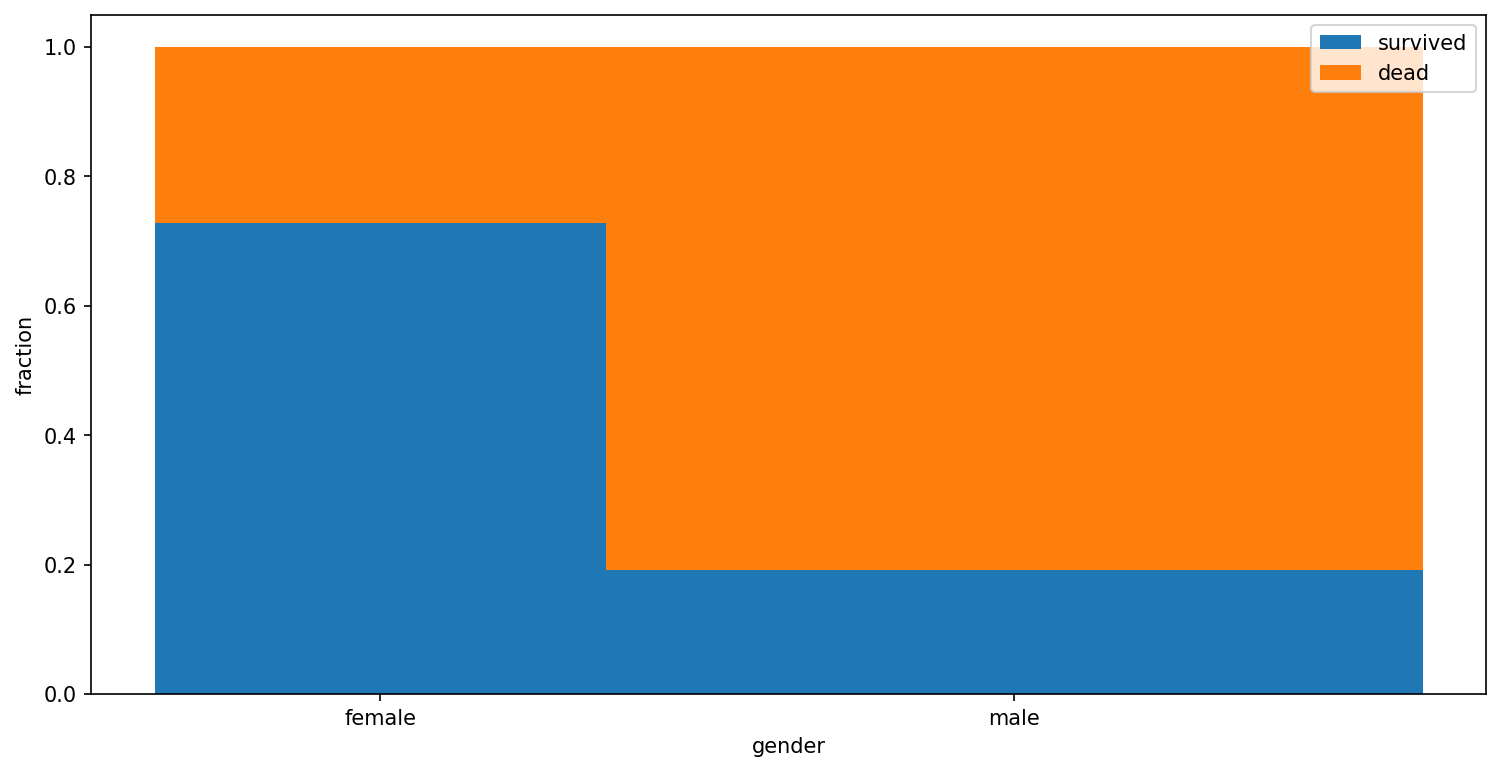

In [28]:
plt.figure(figsize=(12,6), dpi=150)
pos=(0, (c_gender[0]+c_gender[1])/2)
all_sex=survived_sex+dead_sex
p_survived = survived_sex/all_sex
p_dead = dead_sex/all_sex
print(p_survived, c_gender)
plt.bar(x=pos, height=p_survived, width=c_gender, label='survived')
plt.bar(x=pos, bottom=p_survived, height=p_dead, width=c_gender, label='dead')
plt.xticks(pos, genders)
plt.legend()
plt.xlabel('gender')
plt.ylabel('fraction')
plt.show()

In [29]:
c_classes = df.pclass.value_counts().sort_index()
classes = c_classes.index.values

In [30]:
classes

array([1, 2, 3])

In [31]:
c_classes

1    323
2    277
3    709
Name: pclass, dtype: int64

In [32]:
pos=[0, (c_classes[1]+c_classes[2])/2, (c_classes[1]+c_classes[3])/2+c_classes[2]]
survived_class = df[df.survived==1].pclass.value_counts().sort_index()
dead_class = df[df.survived==0].pclass.value_counts().sort_index()
all_class=survived_class+dead_class
p_survived = survived_class/all_class
p_dead = dead_class/all_class

In [33]:
p_survived

1    0.619195
2    0.429603
3    0.255289
Name: pclass, dtype: float64

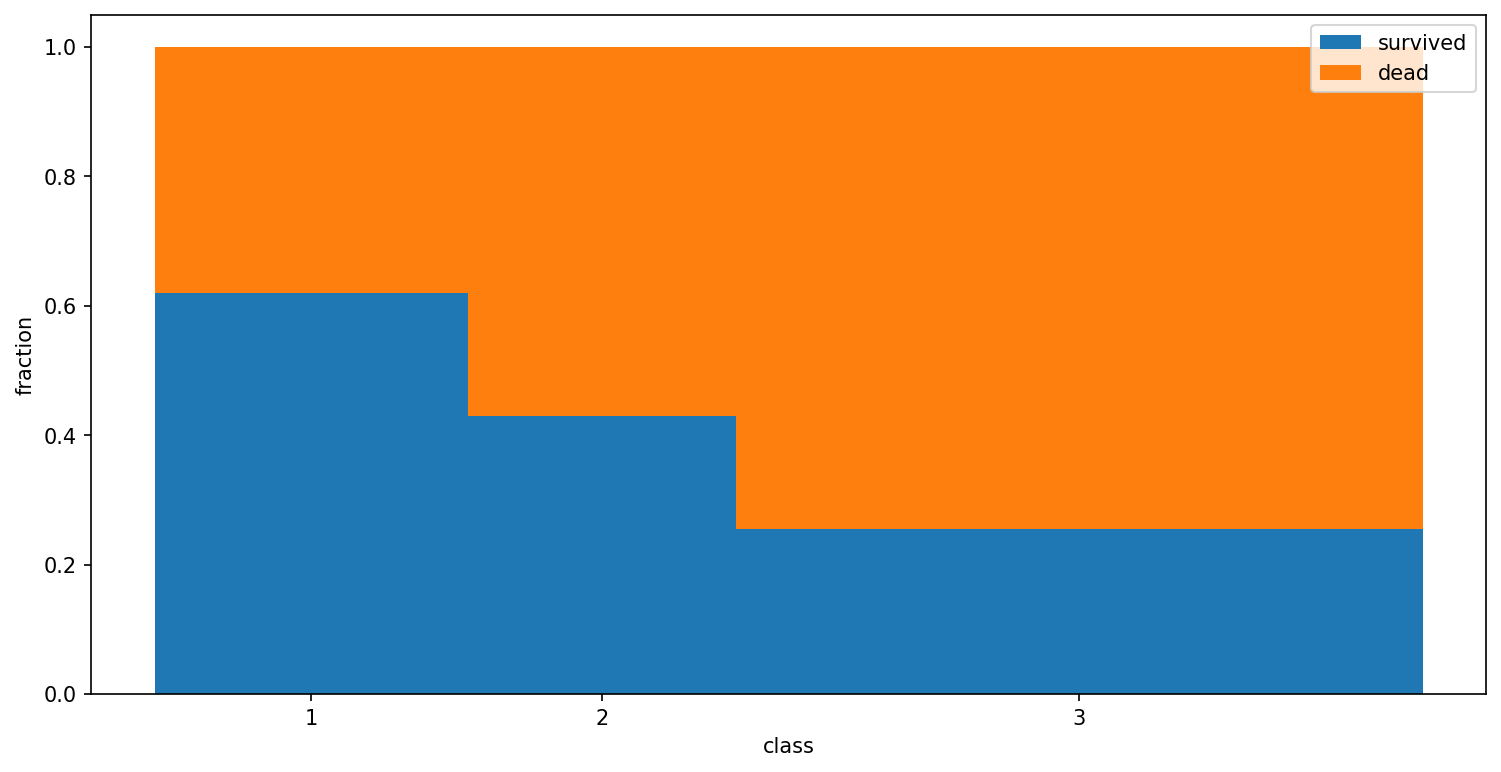

In [34]:
plt.figure(figsize=(12,6), dpi=150)
plt.bar(x=pos, height=p_survived, width=c_classes, label='survived')
plt.bar(x=pos, bottom=p_survived, height=p_dead, width=c_classes, label='dead')
plt.xticks(pos, classes)
plt.legend()
plt.xlabel('class')
plt.ylabel('fraction')
plt.show()

Nei grafici sopra abbiamo rappresentato gli istogrammi con una larghezza pari al numero di persone in ciascuna categoria (maschi o femmine; 1^, 2^, o 3^ classe). Sull'asse verticale abbiamo rappresentato la frazione, ovvero, per come l'abbiamo definita, la probabilità dell'esito (sopravvissuto o morto). **Ciasuno dei rettangoli ha l'area proporzionale al numero di persone in ciascuna categoria**. In un istogramma classico, invece, il numero di persone è rappresentato come altezza della barra.

In [35]:
cat_years = 5
df['age_cat'] = (np.floor(df['age']/cat_years)*cat_years+cat_years/2)
df['age_cat'].value_counts().sort_index()

2.5      51
7.5      31
12.5     27
17.5    116
22.5    184
27.5    160
32.5    132
37.5    100
42.5     69
47.5     66
52.5     43
57.5     27
62.5     27
67.5      5
72.5      6
77.5      1
82.5      1
Name: age_cat, dtype: int64

Con la funzione [```cross_tab```](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) si può creare una tabella con i valori di una colonna (es.: ```survived```) usando come indice un altra colonna (es.: ```age_cat```). Tutto è generalizzabile a pià colonne.

In [36]:
cross_tab = pd.crosstab(index=df.age_cat, columns=[df.survived], rownames=["age_cat"], colnames=["survived"])
cross_tab

survived,0,1
age_cat,,
2.5,18,33
7.5,14,17
12.5,16,11
17.5,71,45
22.5,113,71
27.5,104,56
32.5,78,54
37.5,56,44
42.5,49,20


Con la funzione [```cross_tab```](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) si può creare una tabella con i valori di una colonna (es.: ```survived```) usando come indice un altra colonna (es.: ```age_cat```). Tutto è generalizzabile a pià colonne.

In [37]:
cross_tab['all']=cross_tab.loc[:,0]+cross_tab.loc[:,1]
cross_tab['f_survived']=cross_tab.loc[:,1]/cross_tab['all']
cross_tab['f_dead']=cross_tab.loc[:,0]/cross_tab['all']
cross_tab

survived,0,1,all,f_survived,f_dead
age_cat,,,,,
2.5,18,33,51,0.647059,0.352941
7.5,14,17,31,0.548387,0.451613
12.5,16,11,27,0.407407,0.592593
17.5,71,45,116,0.387931,0.612069
22.5,113,71,184,0.385870,0.614130
27.5,104,56,160,0.350000,0.650000
32.5,78,54,132,0.409091,0.590909
37.5,56,44,100,0.440000,0.560000
42.5,49,20,69,0.289855,0.710145


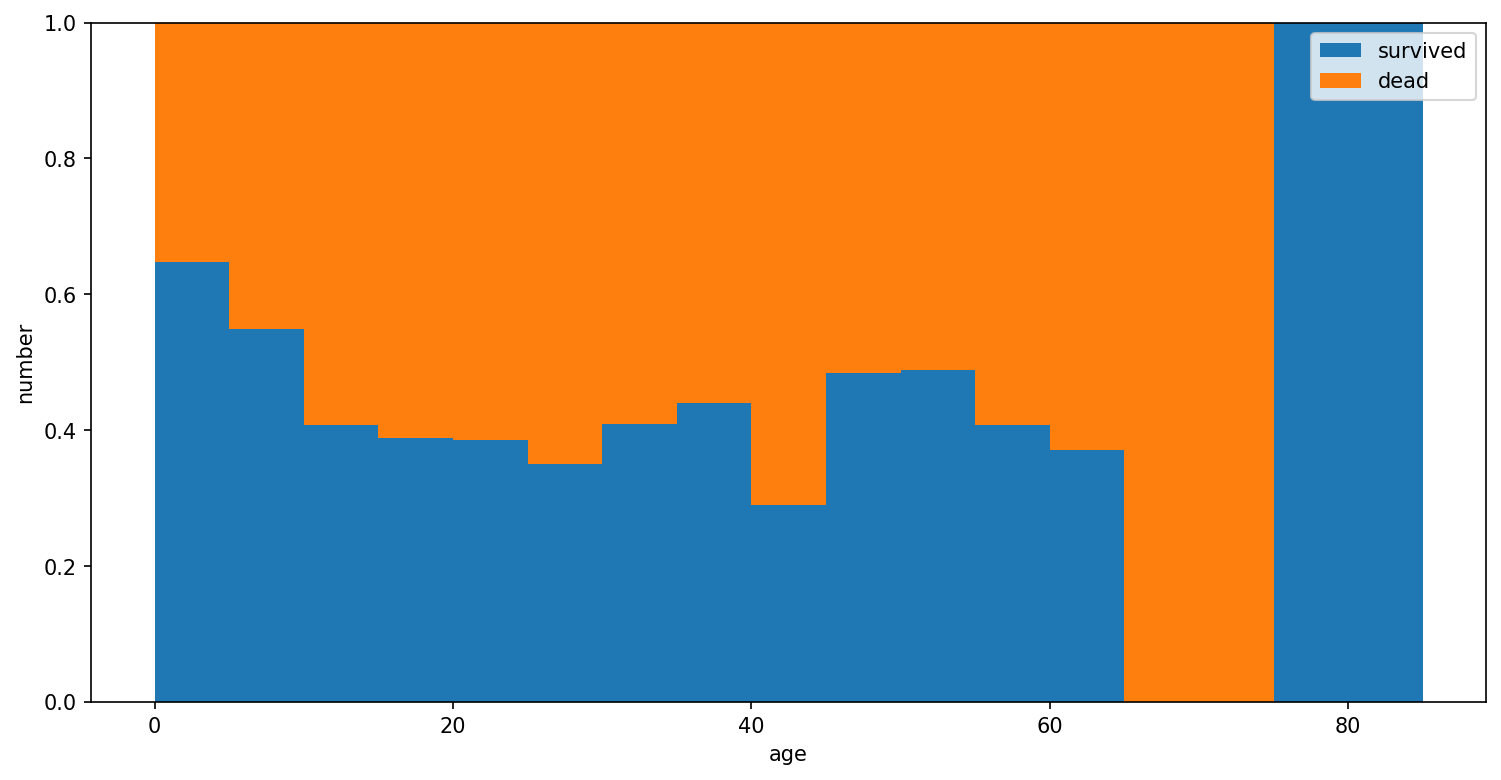

In [38]:
plt.figure(figsize=(12,6), dpi=150)
plt.bar(x=cross_tab.index, width=cat_years, height=cross_tab['f_survived'], label='survived')
plt.bar(x=cross_tab.index, width=cat_years, bottom=cross_tab['f_survived'], height=1-cross_tab['f_survived'], label='dead')
plt.xlabel('age')
plt.ylabel('number')
plt.legend()
plt.show()

## Raggruppamento per valori di alcune colonne

I casi possono essere raggruppati selezionando in base ai valori di alcune colonne.

I usa per questo la funzione [```groupby```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [39]:
sex_pclass=df.groupby(['sex','pclass']).size()
sex_pclass

sex     pclass
female  1         144
        2         106
        3         216
male    1         179
        2         171
        3         493
dtype: int64

In [40]:
type(sex_pclass)

pandas.core.series.Series

La tabella che abbiamo ottenuto ha [più indici](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html).

In [41]:
sex_pclass.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

Possiamo estrarre i singoli indici.

In [42]:
idx0= sex_pclass.index.get_level_values(0).unique()
idx0

Index(['female', 'male'], dtype='object', name='sex')

In [43]:
idx1=sex_pclass.index.get_level_values(1).unique()
idx1

Int64Index([1, 2, 3], dtype='int64', name='pclass')

In [44]:
print(idx0.size, idx1.size)

2 3


I valori possono essere riorganizzati in tabella usando la funzione [```unstack```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html).

In [45]:
map =sex_pclass.unstack(level=1)
map

pclass,1,2,3
sex,,,
female,144,106,216
male,179,171,493


In [46]:
type(map)

pandas.core.frame.DataFrame

In [47]:
map.iloc[0,2]

216

Possiamo usare questo tipo di rappresentazione tabellare con un grafico bidimensionale a colori.

Documentazione su heatmap e argomenti simili si trovano qui:
    
* heatmap in matplotlib:
    https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
* diverse colormap disponibili:
    https://matplotlib.org/stable/tutorials/colors/colormaps.html

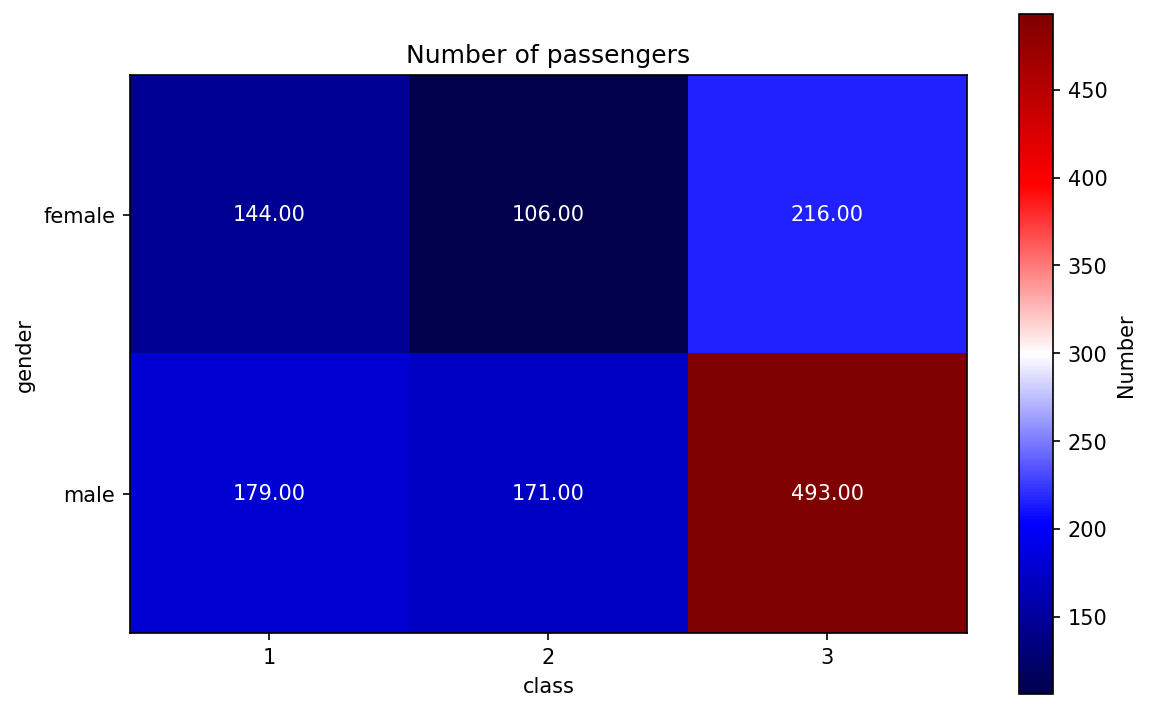

In [48]:
def plot_map(map, title, label):
    fig, ax = plt.subplots(figsize=(9, 6), dpi=150)
    im=ax.imshow(map, cmap='seismic')
    ax.set_xticks(np.arange(idx1.size))
    ax.set_xticklabels(idx1)
    ax.set_yticks(np.arange(idx0.size))
    ax.set_yticklabels(idx0)
    ax.set_xlabel('class')
    ax.set_ylabel('gender')
    for i in range(idx0.size):
        for j in range(idx1.size):
            text = ax.text(j, i, '{:.02f}'.format(map.iloc[i, j]), ha="center", va="center", color="white")
    ax.set_title(title)
    cbar = ax.figure.colorbar(im)
    cbar.set_label(label)
    fig.show()
plot_map(map, 'Number of passengers','Number')

Calcoliamo tabelle con numeri di passeggeri sopravvissuti e morti, e facciamone il rapporto.

In [49]:
map_survived=df[df.survived==1].groupby(['sex','pclass']).size().unstack(level=1)
map_dead=df[df.survived==0].groupby(['sex','pclass']).size().unstack(level=1)
map_prob=map_survived/(map)

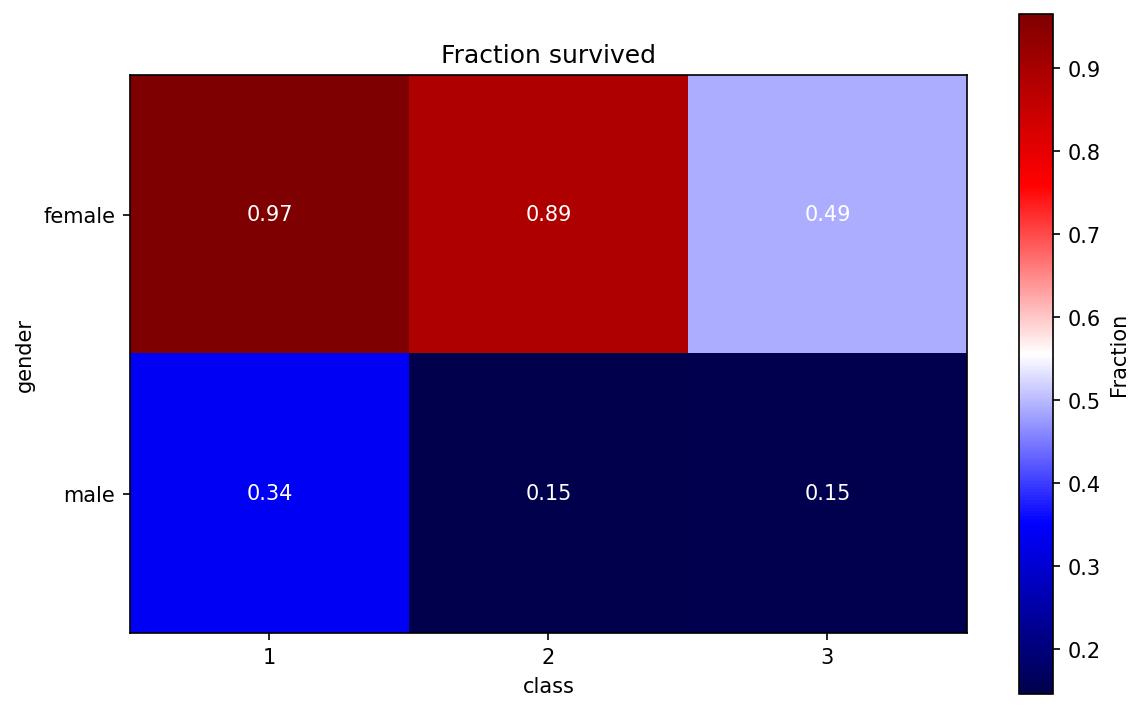

In [50]:
plot_map(map_prob, 'Fraction survived', 'Fraction')

# Probabilità condizionata

Quelli mostrati sopra sono esempi di probabilità condizionata. Formalmente può essere definita come:

$P(A|B) = \frac{\displaystyle P(A\cap B)}{\displaystyle P(B)}$

Ad esempio:

$P(\mathrm{survival}|\mathrm{female}) =  \frac{\displaystyle P(\mathrm{survival}\,\,and\,\,\mathrm{female})}{\displaystyle P(\mathrm{female})}$

Va notata la corrispondenza tra operatori logici sulle condizioni e operatori tra insieme:
* a $\longrightarrow$ $A$
* b $\longrightarrow$ $B$
* a $and$ b $\longrightarrow$ $A \cap B$
* a $or$ b $\longrightarrow$ $A \cup B$
* $not$ a $\longrightarrow$ $A^{c}$

In genere si tende ad abusare della notazione, e condizione o insieme corrispondente sono usati in modo intercambiabile:

$P(\mathrm{female}) \equiv P(\{x: \mathrm{sex}(x)=\mathrm{female}\})$

In [51]:
passengers = df.shape[0]
print('all (P(Omega)):',passengers)

all (P(Omega)): 1309


In [52]:
females = df[df.sex=='female'].shape[0]
print('females (P(B)*N):',females)

females (P(B)*N): 466


In [53]:
females_survived = df[(df.sex=='female') & (df.survived==1)].shape[0]
print('females, survived (P(A and B)*N):',females_survived)

females, survived (P(A and B)*N): 339


In [54]:
females_survived_frac = females_survived/females
print('fraction of survived, females (P(A|B)): {:.2%}'.format(females_survived_frac))

fraction of survived, females (P(A|B)): 72.75%


# Teorema di Bayes

La definizione di probabilità condizionata permette di scrivere due eguaglianze:
    
$P(A|B) = \frac{\displaystyle P(A\cap B)}{\displaystyle P(B)}$

$P(B|A) = \frac{\displaystyle P(A\cap B)}{\displaystyle P(A)}$

Da queste si ricava semplicemente:

$P(A|B) = \frac{\displaystyle P(B|A) P(A)}{\displaystyle P(B)}$


In [55]:
survived = df[df.survived==1].shape[0]
print('survived P(A)*N: ', survived)

survived P(A)*N:  500


In [56]:
survived_females_frac = females_survived/survived
print('females survived P(B|A): {:.2%}'.format(survived_females_frac))

females survived P(B|A): 67.80%


In [58]:
females_survived_frac_bayes = survived_females_frac*(survived/survived)/(females/survived)
print('fraction of females, survived P(A|B)): {:.2%}'.format(females_survived_frac_bayes))

fraction of females, survived P(A|B)): 72.75%


Il teorema di Bayes ha diverse applicazioni utili che vedremo in seguito. In particolare, sono utili le applicazioni in problemi medici.

In sostanza, indica come calcolare $P(A|B)$ dato $P(B|A)$, ossia come "invertire" l'espressione della probabilità condizionata.

È importante quindi non confondere le due, cosa che invece intuitivamente si è spesso portati a fare:

La probabilità che un senatore sia donna è diversa dalla probabilità che una donna sia senatrice!

# Spunti per gli esercizi

* Calcolare la probabilità di sopravvivenza per fasce di età
* Calcolare la probabilità di sopravvivenza per fasce di età selezionando un campione omogeneo (es.: uomini, terza classe, donne prima classe, ecc.)
* Calcolare la probabilità di sopravvivenza per le diverse zone in cui erano suddivise le cabine. Per approfondire, ulteriori informazioni sulla disposizione delle cabine nel Titanic si trovano [qui](http://www.paullee.com/titanic/Isham.php).
